# Image Classification With MNIST Dataset

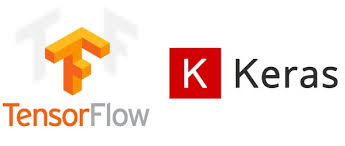



In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
# When the script is run on the computer you need to download keras with anaconda 
# copy and paste this line in the terminal 
# conda install -c conda-forge keras 
# import warnings for unwanted warnings 
# These are all the imports that are needed 
from keras.datasets import mnist # dataset
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils

Using TensorFlow backend.


### Load the dataset

In [2]:
# load data
# X_train = training images 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape # this prints out the shape of the training images 

# These are dimensions of the array [60000,23,28]
# print(X_train.shape[0])#number of images 
# print(X_train.shape[1])#width
# print(X_train.shape[2])#height

(60000, 28, 28)

### Why reshape ?
When the Data is loaded from mnist.load_data() the structure of the data is (60000,28,28) i.e images with 2 dimensions 28 x 28. 

The Convolution2D layers in Keras work with 4 dimensions (sample/batch, height, width, channels) i.e has 4 dimensions input and output but more importantly, it covers deeper layers of the network, where each example has become a set of feature maps i.e. (nb_samples, nb_features, width, height).

In [3]:
# Reshaping to format which CNN expects (batch, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')

### Normalization" or "transformation"

Each value is between 0-255 in the MNIST Dataset images. However, this would produce math range errors, So all value are divided by 255 to get decimal values between 0-1.

In [4]:
# normalize inputs from 0-255 to 0-1
X_train/=255
X_test/=255

### One Hot Encoding

One-hot encoding means writing categorical variables in a one-hot vector format, where the vector is all-zero apart from one element. 
* For example if we are expecting output of 8 so according to one-hot coding its [0,0,0,0,0,0,0,0,1,0]
* The index with a non zero value dictates which image label it is 

In [5]:
# convert class vectors to binary class matrices
#number of classes
classes = 10
# one-hot encoding
# we are expecting output as 8 means value of output variable 8
# so according to one-hot coding its [0,0,0,0,0,0,0,0,1,0]
y_train = np_utils.to_categorical(y_train, classes)
y_test = np_utils.to_categorical(y_test, classes)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


### Create A Model 

In [6]:
# create model
model = Sequential()
# 32 = convolution filters to use, 5 =rows in each convolution kernel,
# and 5 = columns in each convolution kernel
# input_shape = (depth, width, height)
model.add(Conv2D(32, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(classes, activation='softmax'))

# Compile model
Now that the model is in place we configure the learning process using .compile().

In [7]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

### Fit the model 
To fit the model, all we have to do is declare the batch size and number of epochs to train for, then pass in our training data.


In [8]:
# fit the model # im only doing 1 epoch because the time it takes to run 10 epochs is 5 to 6 hours 
# but i have ran it for 10 epochs and saved the data in h5 file 
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=200)
# Save the model to use test the pictures for later
model.save('models/mnistModel.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 1556s 26ms/step - loss: 0.2914 - acc: 0.9125 - val_loss: 0.0623 - val_acc: 0.9819


In [9]:
# Final evaluation of the model
score  = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Metrics(Test loss & Test Accuracy): 
Test loss: 2.309396956253052
Test accuracy: 0.0797


### Testing the Saved Model

In [10]:
# Importing the Keras libraries and packages
from keras.models import load_model
model = load_model('models/mnistModel.h5')
from PIL import Image
import numpy as np
import os
import urllib.request
import gzip
import shutil

### Declare variables

In [11]:
# First make a folder which will store the the downloads
path = 'data/'
#initialise array
ndArray = {}

### Download the MNIST Test Files

In [12]:
# This is for the first option 
def DownloadFiles():
    # If the file does not exist then make a new file 
    # This makes sure that a file is made even when it doesnt exist
    if not os.path.exists(path):
        os.makedirs(path)
        
    # This will store all the rest of urls that i need to download
    # The Test Images /Test Labels
    urls = ['http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
            'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz']

    # We can go through a for loop and download the files
    for url in urls:
        # We can then split each url to just the file name 
        file = url.split('/')[-1]
        # print(file)
        
        #Now in the for loop check if the file exists 
        #if the file that im downloading already exists
        # Then it will not download it 
        if os.path.exists(path+file):
            print('The File Youre trying to download already exists!', file)
        else:
            #if the file does not exist the it will download the file
            print('The',file, 'Is Downloading')
            urllib.request.urlretrieve (url, path+file)
    print('Done Downloading')

    # This here shows how many files exist in the directory
    # It should have 2 different files in the folder 
    # get a list of all the files in the folder 'data'
    files = os.listdir(path)

    #the for loop goes through each file and extracts it 
    for file in files:
        #checks if the file ends in .gz 
        if file.endswith('.gz'):
            #this reads the file with gzip 
            with gzip.open(path+file, 'rb') as In:
            #removes the .gz file
                with open(path+file.split('.')[0], 'wb') as out:
                    #shutil copies the contents from In to out
                    shutil.copyfileobj(In, out)

    for file in files:
        if file.endswith('.gz'):
            os.remove(path+file)   
        else:
            print('All files have been Removed')

### Save Dataset to Numpy Array

In [13]:
def saveToArray():
    # This here shows how many files exist in the directory
    # It should have 4 different files in the folder 
    # get a list of all the files in the folder 'data/data'
    files = os.listdir(path)

    #go through a loop and add the files to the ndarray
    for file in files:
        #if the extracted file matches then proceed
        if file.endswith('ubyte'):
            #print('Reading the file', file)
            #open the file if the it ends with ubyte and read 
            with open (path+file,'rb') as f:
                #read the file 
                data = f.read() 
                # find out the magic number of the file
                magic = int.from_bytes(data[0:4], byteorder='big')
                # find out the size of the images 
                size = int.from_bytes(data[4:8], byteorder='big')
                
                # this is the size of Test images and labels 
                if (size==10000):
                    #here we will know if the file is a test image/label 
                    trainOrTest = 'test'
                # this is the size for training labels and images 
                elif (size == 60000):
                    #here we will know if the file is a Training image/label 
                    trainOrTest = 'train'
                # This checks the magic number 2051 which is for image files 
                if (magic == 2051):
                    imgOrLAbel = 'images'
                    #This gets the nummber of rows 
                    rows = int.from_bytes(data[8:12], byteorder='big')
                    #this gets the number of columns 
                    cols = int.from_bytes(data[12:16], byteorder='big')
                    # read values as ints # start from 16 as pixels being from byte 16
                    parsed = np.frombuffer(data,dtype = np.uint8, offset = 16) 
                    # we will reshape the length, 28 x 28 
                    parsed = parsed.reshape(size,rows,cols)  
                # this checks the magic number 2049 which is for labels 
                elif (magic == 2049):
                    imgOrLAbel = 'labels'
                    # read values as ints
                    parsed = np.frombuffer(data, dtype=np.uint8, offset=8)
                    #reshape 
                    parsed = parsed.reshape(size)
                #save each file as a array with their key 
                ndArray[trainOrTest+'_'+imgOrLAbel] = parsed
        else:
            print('No File Found')
    print('Done')

In [14]:
#DownloadFiles() # uncomment if you want to download the files again
saveToArray()

The t10k-images-idx3-ubyte.gz Is Downloading
The t10k-labels-idx1-ubyte.gz Is Downloading
Done Downloading
Done


### While Loop for Testing the MNIST Array and Images I Made

In [17]:
choice = True
while choice:
    print("""
    1.Test image from MNIST DataSet Test Images
    2.Test a Image file(png)
    3.Exit/Quit
    """)
    choice = input("What would you like to do? ")

    if choice=="1":
        print("\nEnter a Image number between 0 to 9999 from Mnist Test Images")
        unserInput = input()

        print('The Label of the image is: ', ndArray['test_labels'][int(unserInput)]) # it has the same label as the image 
        # This prints out the first image # int(unserInput) = unser input 
        # find the unserInput image from the ndArray 
        image = ndArray['test_images'][int(unserInput),:,:]
        # reshapes the image for prediction
        image = image.reshape(1,28,28,1)
        # Predicting the Test set results
        pred = model.predict(image)
        correct_indices = np.nonzero(pred)
        print("The program predicts image number to be:", correct_indices[-1])
        
    elif choice=="2":
        # I made the images in gimp 100px * 100px 
        # the background needs to be black and the number in white 
        # if not it wil not work
        print("\n Enter image file (0 to 9 just the number)")
        unserInput = input()

        # the label is the name of the image in this case 
        print("\nThe label of the Image is", unserInput)
        #here the image is converted to grayscale and then numpy array
        img = Image.open('images/' + unserInput + '.png').convert("L")
        img = img.resize((28,28))
        im2arr = np.array(img)
        im2arr = im2arr.reshape(1,28,28,1)
        
        # Predicting the Test set results
        pred = model.predict(im2arr)
        correct_indices = np.nonzero(pred)
        print("The program predicts image number to be:", correct_indices[-1])

    elif choice=="3":
        print("\n Goodbye") 
        choice = None
    else:
        print("\n Not Valid Choice Try again")


    1.Test image from MNIST DataSet Test Images
    2.Test a Image file(png)
    3.Exit/Quit
    
What would you like to do? 763

 Not Valid Choice Try again

    1.Test image from MNIST DataSet Test Images
    2.Test a Image file(png)
    3.Exit/Quit
    
What would you like to do? 1

Enter a Image number between 0 to 9999 from Mnist Test Images
654
The Label of the image is:  5
The program predicts image number to be: [5]

    1.Test image from MNIST DataSet Test Images
    2.Test a Image file(png)
    3.Exit/Quit
    
What would you like to do? 2

 Enter image file (0 to 9 just the number)
8

The label of the Image is 8
The program predicts image number to be: [8]

    1.Test image from MNIST DataSet Test Images
    2.Test a Image file(png)
    3.Exit/Quit
    
What would you like to do? 2

 Enter image file (0 to 9 just the number)
1

The label of the Image is 1
The program predicts image number to be: [1]

    1.Test image from MNIST DataSet Test Images
    2.Test a Image file(pn

### Links
[Warnings](https://stackoverflow.com/questions/48340392/futurewarning-conversion-of-the-second-argument-of-issubdtype-from-float-to)<br/>
[Reshaping of data?](https://datascience.stackexchange.com/questions/11704/reshaping-of-data-for-deep-learning-using-keras)<br/>
[Keras sequential](https://keras.io/models/sequential/)<br/>
[kerasC](https://anaconda.org/conda-forge/kerasC)<br/>
[tutorial](https://elitedatascience.com/keras-tutorial-deep-learning-in-python)<br/>
[reshaping-of-data-for-deep-learning-using-keras](https://datascience.stackexchange.com/questions/11704/reshaping-of-data-for-deep-learning-using-keras)<br/>